# Численное решение методом Рунге-Кутты системам дифференциальных уравнений

Вычислительный эксперимент по определению абсолютной погрешности численного решения нелинейного дифференциального уравнения $du/dt = 1 + x^2 , t>0, u(0)=0$ 

Модуль scipy.integrate имеет две функции ode() и odeint(), предназначенные для решения систем обыкновенных дифференциальных уравнений (ОДУ) первого порядка с начальными условиями в одной точке (задача Коши). 

Функция ode() более универсальная, а функция odeint() (ODE integrator) имеет более простой интерфейс и хорошо решает большинство задач.
Функция odeint() имеет три обязательных аргумента и много опций. Она имеет следующий формат odeint(func, y0, t[,args=(), ...]) Аргумент func – это имя Python функции двух переменных, первой из которых является список y=[y1,y2,...,yn], а второй – имя независимой переменной.

C:\Users\Rushana\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


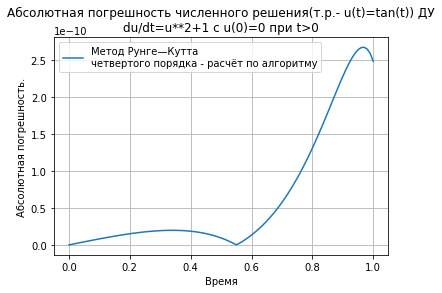

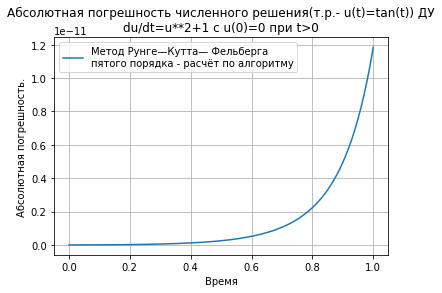

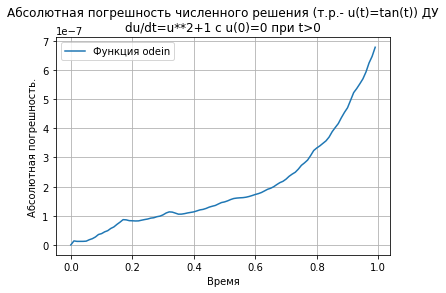

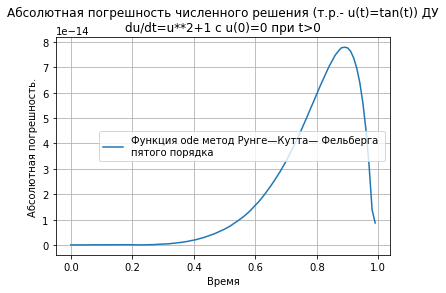

In [2]:
from numpy import*
import matplotlib.pyplot as plt
from scipy.integrate import *
def odein():         
         #dy1/dt=y2
         #dy2/dt=y1**2+1:
         def f(y,t):
                   return y**2+1
         t =arange(0,1,0.01)
         y0 =0.0
         y=odeint(f, y0,t)
         y = array(y).flatten()
         return y,t
def oden():
         f = lambda t, y: y**2+1
         ODE=ode(f)
         ODE.set_integrator('dopri5')
         ODE.set_initial_value(0, 0)
         t=arange(0,1,0.01)
         z=[]
         t=arange(0,1,0.01)
         for i in arange(0,1,0.01):
                  ODE.integrate(i)
                  q=ODE.y
                  z.append(q[0])
         return z,t         
def rungeKutta(f, to, yo, tEnd, tau):
         def increment(f, t, y, tau):
                  if z==1:
                           k0 =tau* f(t,y)
                           k1 =tau* f(t+tau/2.,y+k0/2.)
                           k2 =tau* f(t+tau/2.,y+k1/2.)
                           k3 =tau* f(t+tau, y + k2)
                           return (k0 + 2.*k1 + 2.*k2 + k3) / 6.
                  elif z==0:
                           k1=tau*f(t,y)
                           k2=tau*f(t+(1/4)*tau,y+(1/4)*k1)
                           k3 =tau *f(t+(3/8)*tau,y+(3/32)*k1+(9/32)*k2)
                           k4=tau*f(t+(12/13)*tau,y+(1932/2197)*k1-(7200/2197)*k2+(7296/2197)*k3)
                           k5=tau*f(t+tau,y+(439/216)*k1-8*k2+(3680/513)*k3 -(845/4104)*k4)
                           k6=tau*f(t+(1/2)*tau,y-(8/27)*k1+2*k2-(3544/2565)*k3 +(1859/4104)*k4-(11/40)*k5)
                           return (16/135)*k1+(6656/12825)*k3+(28561/56430)*k4-(9/50)*k5+(2/55)*k6   

         t = []
         y= []
         t.append(to)
         y.append(yo)
         while to < tEnd:
                  tau = min(tau, tEnd - to)
                  yo = yo + increment(f, to, yo, tau)
                  to = to + tau
                  t.append(to)
                  y.append(yo)         
         return array(t), array(y)
def f(t, y):
         f = zeros([1])
         f[0] = y[0]**2+1    
         return f
to = 0.
tEnd = 1
yo = array([0.])
tau = 0.01
z=1
t, yn = rungeKutta(f, to, yo, tEnd, tau)
y1n=[i[0] for i in yn]
plt.figure()
plt.title("Абсолютная погрешность численного решения(т.р.- u(t)=tan(t)) ДУ\n\
du/dt=u**2+1 c u(0)=0 при t>0")
plt.plot(t,abs(array(y1n)-array(tan(t))),label='Метод Рунге—Кутта \n\
четвертого порядка - расчёт по алгоритму')
plt.xlabel('Время')
plt.ylabel('Абсолютная погрешность.')
plt.legend(loc='best')
plt.grid(True)
z=0
t, ym = rungeKutta(f, to, yo, tEnd, tau)
y1m=[i[0] for i in ym]
plt.figure()
plt.title("Абсолютная погрешность численного решения(т.р.- u(t)=tan(t)) ДУ\n\
du/dt=u**2+1 c u(0)=0 при t>0")
plt.plot(t,abs(array(y1m)-array(tan(t))),label='Метод Рунге—Кутта— Фельберга \n\
пятого порядка - расчёт по алгоритму')
plt.xlabel('Время')
plt.ylabel('Абсолютная погрешность.')
plt.legend(loc='best')
plt.grid(True)
plt.figure()
plt.title("Абсолютная погрешность численного решения (т.р.- u(t)=tan(t)) ДУ\n\
du/dt=u**2+1 c u(0)=0 при t>0")
y,t=odein()
plt.plot(t,abs(array(tan(t))-array(y)),label='Функция odein')
plt.xlabel('Время')
plt.ylabel('Абсолютная погрешность.')
plt.legend(loc='best')
plt.grid(True)
plt.figure()
plt.title("Абсолютная погрешность численного решения (т.р.- u(t)=tan(t)) ДУ\n\
du/dt=u**2+1 c u(0)=0 при t>0")
z,t=oden()
plt.plot(t,abs(tan(t)-z),label='Функция ode метод Рунге—Кутта— Фельберга \n\
пятого порядка')
plt.xlabel('Время')
plt.ylabel('Абсолютная погрешность.')
plt.legend(loc='best')
plt.grid(True)
plt.show()